In [73]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Dropout
from tensorflow.keras.utils import to_categorical


In [25]:
mnist = pd.read_csv(r"C:\Users\ADITYA\Downloads\MNIST_Train.csv")

In [26]:
from sklearn.model_selection import train_test_split

mn_train , mn_test = train_test_split(mnist, test_size = .2) 

mn_train_x = mn_train.iloc[: , 1::]
mn_train_y = mn_train.iloc[: , 0]

mn_test_x = mn_test.iloc[: , 1::]
mn_test_y = mn_test.iloc[: , 0]

In [27]:
mn_train_x = np.array(mn_train_x)
mn_train_y = np.array(mn_train_y)
mn_test_x = np.array(mn_test_x)

In [28]:
mn_train_x = mn_train_x.reshape( -1, 28, 28, 1)
mn_test_x = mn_test_x.reshape( -1, 28, 28, 1)

In [29]:
mn_train_y = to_categorical(mn_train_y)

In [66]:
model = Sequential()
model.add(Conv2D(filters = 512 , kernel_size = (5,5), activation = "relu", padding = 'same' , input_shape = (28 , 28 , 1)))
model.add(MaxPool2D(pool_size = (3,3)))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))

model.add(Dense(10 , activation = 'softmax'))


In [67]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [68]:
model.fit(mn_train_x,mn_train_y, epochs = 5, validation_split = .2)

Epoch 1/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.9360 - loss: 0.6651 - val_accuracy: 0.9690 - val_loss: 0.1047
Epoch 2/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.9798 - loss: 0.0658 - val_accuracy: 0.9693 - val_loss: 0.1166
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9726 - val_loss: 0.1066
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - accuracy: 0.9866 - loss: 0.0445 - val_accuracy: 0.9714 - val_loss: 0.1271
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9732 - val_loss: 0.1395


In [69]:
pred = model.predict(mn_test_x)
from sklearn.metrics import classification_report, confusion_matrix
tab = confusion_matrix(mn_test_y, pred.argmax(axis = 1))
print(tab) 
print(classification_report(mn_test_y, pred.argmax(axis = 1)))

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
[[834   1   0   1   0   1   6   0   0   2]
 [  2 938   4   3   8   1   1   9   3   0]
 [  6   1 773   5  26   0   1  17   2   0]
 [  0   0   2 852   1   1   1   1   1   1]
 [  0   0   1   0 812   0   3   3   0   1]
 [  1   0   0   2   1 742   4   1   2   4]
 [  3   2   1   0   4   1 841   0   1   1]
 [  2   1   2   1   2   0   0 845   0   5]
 [ 12  11   4   4   1   1   8   4 743   2]
 [  0   0   0   0  17   4   0  14   1 780]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       845
           1       0.98      0.97      0.98       969
           2       0.98      0.93      0.96       831
           3       0.98      0.99      0.99       860
           4       0.93      0.99      0.96       820
           5       0.99      0.98      0.98       757
           6       0.97      0.98      0.98       854
           7       0.95      0.98      0.96       858
           8       0.99      0.94      0

In [ ]:
# filters increase time taken will increase
# dense increase time taken will increase
# epochs
# validation split
# batch size


In [144]:
from keras.datasets import fashion_mnist

(fas_train_x , fas_train_y),(fas_test_x, fas_test_y) = fashion_mnist.load_data()

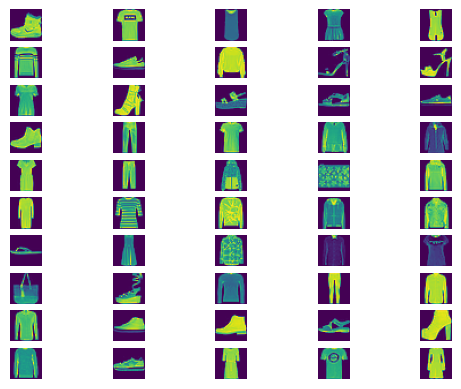

In [145]:
for i in range(50):
    plt.subplot(10,5, i+1)
    plt.imshow(fas_train_x[i,:])
    plt.axis("Off")

In [146]:
fas_train_y = to_categorical(fas_train_y)

In [147]:
model = Sequential()
model.add(Conv2D(filters = 128 , kernel_size = (5,5), activation = "relu", padding = 'same' , input_shape = (28 , 28 , 1)))
model.add(MaxPool2D(pool_size = (3,3)))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128, activation = 'relu'))


model.add(Dense(10 , activation = 'softmax'))

In [148]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [149]:
model.fit(fas_train_x,fas_train_y, epochs = 10, validation_split = .2 , batch_size = 64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8456 - loss: 0.8673 - val_accuracy: 0.8800 - val_loss: 0.3382
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8936 - loss: 0.2930 - val_accuracy: 0.8935 - val_loss: 0.2989
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9065 - loss: 0.2533 - val_accuracy: 0.8938 - val_loss: 0.3001
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9122 - loss: 0.2365 - val_accuracy: 0.8953 - val_loss: 0.3087
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9191 - loss: 0.2167 - val_accuracy: 0.8938 - val_loss: 0.3086
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9225 - loss: 0.2044 - val_accuracy: 0.8900 - val_loss: 0.3362
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9261 - loss: 0.1939 - val_accuracy: 0.8936 - val_loss: 0.3338
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9331 - loss: 0.1777 - 

In [150]:
fas_train_y.shape

(60000, 10)

In [151]:
pred = model.predict(fas_test_x)
from sklearn.metrics import classification_report, confusion_matrix
tab = confusion_matrix(fas_test_y, pred.argmax(axis = 1))
print(tab) 
print(classification_report(fas_test_y, pred.argmax(axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[817   2  15  19   6   2 136   0   3   0]
 [  3 981   1   7   3   0   4   0   1   0]
 [ 19   1 792   6 115   0  66   0   1   0]
 [ 26   7  16 881  41   0  27   0   2   0]
 [  0   3  50  14 884   0  48   0   1   0]
 [  0   0   0   0   0 966   0  30   0   4]
 [ 98   2  65  30  60   0 739   0   6   0]
 [  0   0   0   0   0   5   0 984   0  11]
 [  4   1   3   0   5   2   3   4 978   0]
 [  1   0   0   0   0  11   0  47   0 941]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.79      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.79      0.88      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.74      0.73      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.98      0.

In [152]:
tab.diagonal().sum() / tab.sum()

np.float64(0.8963)